# Data Challenge : Historical consumption regression for electricity supply pricing
------------------------------
### ElasticNet predictions

## Importings and data preparations

In [9]:
import numpy as np# linear algebra
import math
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import catboost regressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt


# local import
from model import preprocessing
# ignoring all warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
## Importing data

plt.style.use('fivethirtyeight')
figparams = {'figsize':(20,8), 'lw':0.8}
#Import training data
inputFilePath = "./input_training_ssnsrY0.csv"
data_train = pd.read_csv(inputFilePath, delimiter = ',', skiprows = 0, index_col=[0])
id_train=data_train.timestamp

#Import testing data
inputFilePathTest = "./input_test_cdKcI0e.csv"
data_test = pd.read_csv(inputFilePathTest, delimiter = ',', skiprows = 0, index_col=[0])
id_test = data_test.index
# import targets
outputFilePath = "./output_training_Uf11I9I.csv"
y_data = pd.read_csv(outputFilePath, delimiter = ',', skiprows = 0, index_col=[0])

In [11]:
## data preprocessing and split
data=preprocessing.Data(data_train,data_test,y_data)
data.data_preprocessing()
X_train1,X_train2,X_test1,X_test2=data.get_data_split()
y_train1,y_train2=data.get_split_y_data()

###### --------------------------------------------

# Location 1

## 1-Data and features preparation

In [12]:
# features selection
features_lm_loc1=['hour','isWeekend','weekofyear','month','dayofweek','isHoliday','consumption_secondary_1',
                  'consumption_secondary_2', 'consumption_secondary_3', 'temp_1_smooth7D', 'humidity_1_smooth7D']

# training data
X_train1 = data.data_train[features_lm_loc1]



# test data
X_test1 = data.data_test[features_lm_loc1]

## 2-Grid Search for hyperparameters 

In [13]:
# instantiate a pipeline
steps = [('scaler',StandardScaler()),
        ('ElasticNet',ElasticNet())]

pipeline = Pipeline(steps)

# hyperparameters to tune
parameters = {'ElasticNet__l1_ratio': np.arange(0,1.1,0.1),
             'ElasticNet__alpha':[0.1, 0.4, 0.7, 1, 10]}

# Create a TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# perform grid search
cv_results = GridSearchCV(pipeline, param_grid=parameters, cv=time_kfold,scoring='neg_mean_absolute_error')
cv_results.fit(X_train1, y_train1)

# best score and params
print("best score (neg-MAE): ", cv_results.best_score_)
print('best parameters: ',cv_results.best_params_)

best score (neg-MAE):  -15.908128536853026
best parameters:  {'ElasticNet__alpha': 0.4, 'ElasticNet__l1_ratio': 1.0}


## 3-Generating predictions 

Text(0.5, 1.0, 'Predictions for location 1')

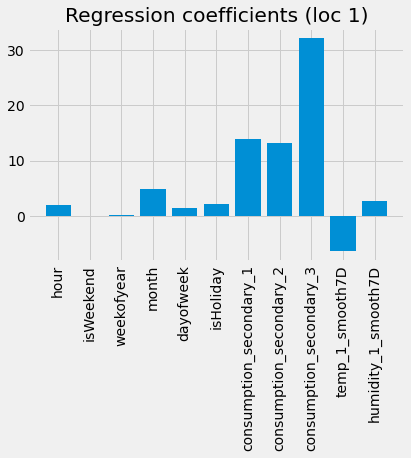

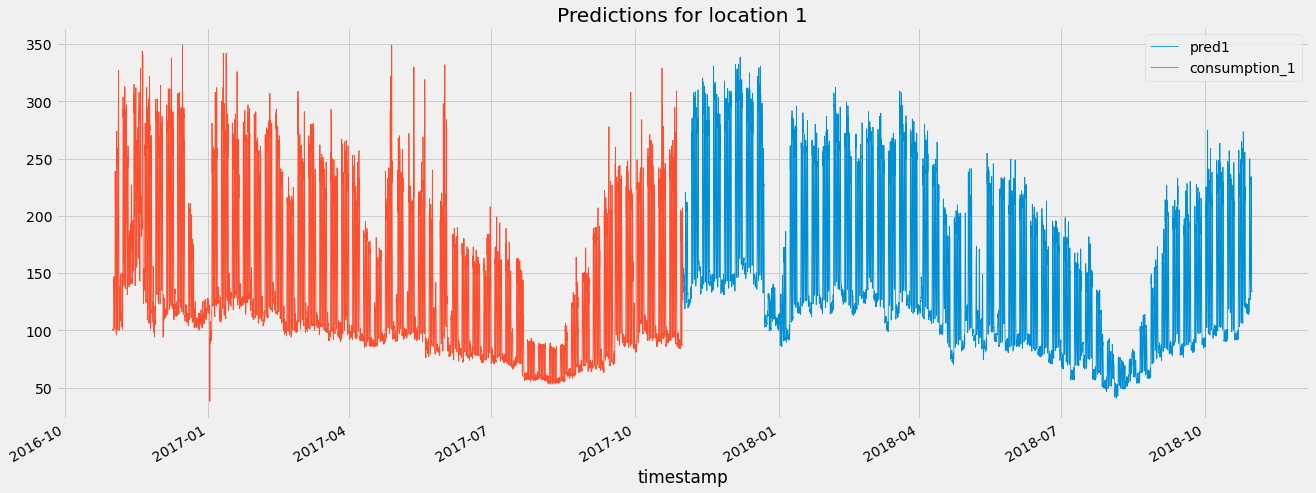

In [14]:
# instantiate pipeline
steps = [('scaler',StandardScaler()),
        ('ElasticNet',ElasticNet(alpha=0.4, l1_ratio=1.0))]
pipeline = Pipeline(steps)

# fit the model and predict
pipeline.fit(X_train1, y_train1)
pred1 = pipeline.predict(X_test1)
pred1_df = pd.DataFrame(pred1, index=data.data_test.index, columns=['pred1'])

# plotting regression coefficients
plt.bar(features_lm_loc1, pipeline['ElasticNet'].coef_)
plt.xticks(rotation=90)
plt.title('Regression coefficients (loc 1)')

# plotting predictions for location 1
pred1_df.plot(**figparams, legend=True)
y_train1.plot(**figparams, legend=True)
plt.title('Predictions for location 1')

### More plots

<AxesSubplot:xlabel='timestamp'>

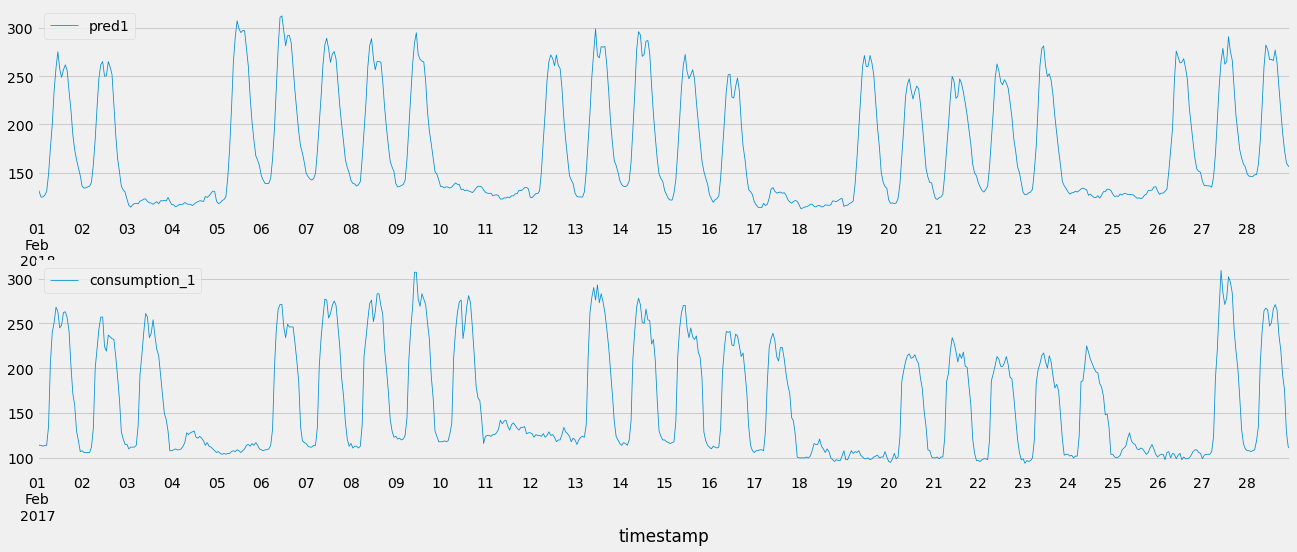

In [15]:
fig,ax=plt.subplots(2,1)
pred1_df.loc['2018-02'].plot(figsize=(20,8), lw=0.8, legend=True, ax=ax[0], sharey=True)
y_train1.loc['2017-02'].plot(figsize=(20,8), lw=0.8, legend=True, ax=ax[1], sharey=True)

------------------


# Location 2

## 1-Data and features preparation

In [16]:
# features selection
features_lm_loc2 =['hour','isWeekend','isHoliday','consumption_secondary_1','consumption_secondary_2','consumption_secondary_3',
                    'temp_2_smooth7D','humidity_2_smooth7D']

# training data
X_train2 = data.data_train[features_lm_loc2]

# test data
X_test2 = data.data_test[features_lm_loc2]

## 2- Grid Search for hyperparamters

In [17]:
# instantiate pipeline
steps = [('scaler',StandardScaler()),
        ('ElasticNet',ElasticNet())]
pipeline = Pipeline(steps)

# hyperparameters to tune
parameters = {'ElasticNet__l1_ratio': np.arange(0,1.1,0.1),
             'ElasticNet__alpha':[0.1, 0.5, 0.9, 1, 5, 10]}


# perform grid search
cv_results = GridSearchCV(pipeline, param_grid=parameters, cv=time_kfold,scoring='neg_mean_absolute_error')
cv_results.fit(X_train2, y_train2)

# print best score and params
print("best score(neg-MAE): ", cv_results.best_score_)
print('best params: ',cv_results.best_params_)

best score(neg-MAE):  -24.337799182924982
best params:  {'ElasticNet__alpha': 0.9, 'ElasticNet__l1_ratio': 0.0}


## 3-Generating predictions

Text(0.5, 1.0, 'Prediction for location 2')

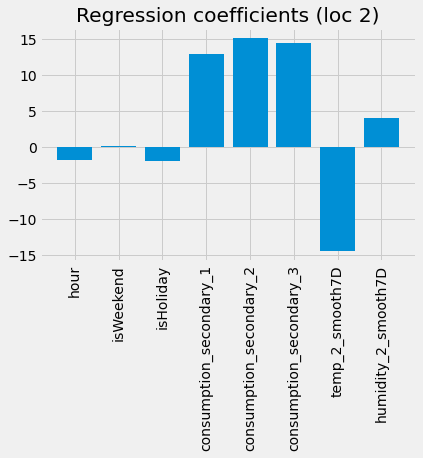

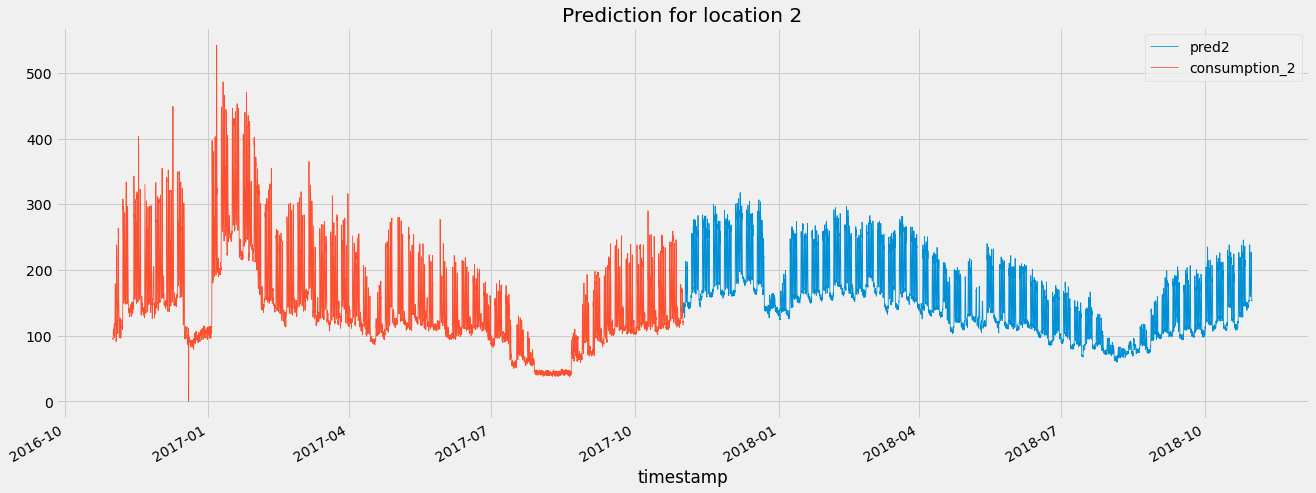

In [18]:
# instantiate pipeline
steps = [('scaler',StandardScaler()),
        ('ElasticNet',ElasticNet(alpha=0.9, l1_ratio=0.0))]
pipeline = Pipeline(steps)

# fit the model and predict
pipeline.fit(X_train2, y_train2)
pred2 = pipeline.predict(X_test2)
pred2_df = pd.DataFrame(pred2, index=data.data_test.index, columns=['pred2'])

# plotting regression coefficients
plt.bar(features_lm_loc2, pipeline['ElasticNet'].coef_)
plt.xticks(rotation=90)
plt.title('Regression coefficients (loc 2)')

# plotting predictions for location 2
pred2_df.plot(**figparams, legend=True)
y_train2.plot(**figparams, legend=True)
plt.title('Prediction for location 2')

### More plots

<AxesSubplot:xlabel='timestamp'>

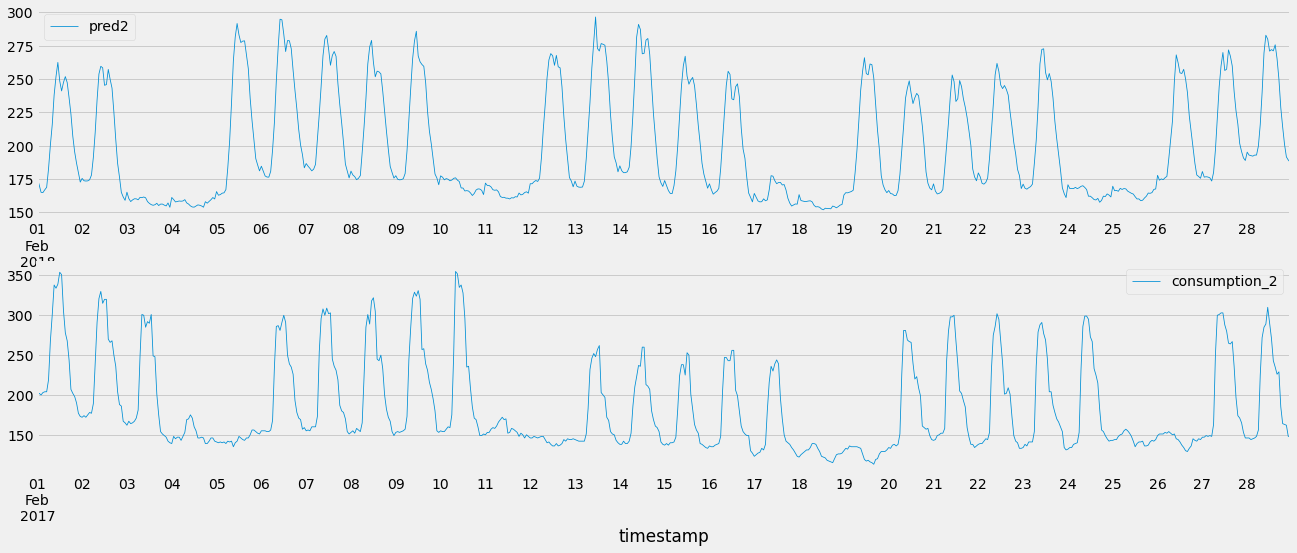

In [19]:
fig,ax=plt.subplots(2,1)
pred2_df.loc['2018-02'].plot(figsize=(20,8), lw=0.8, legend=True, ax=ax[0], sharey=True)
y_train2.loc['2017-02'].plot(figsize=(20,8), lw=0.8, legend=True, ax=ax[1], sharey=True)

# Submission

In [20]:
sub = pd.concat([pred1_df.round(1),pred2_df.round(1)], axis=1).set_index(id_test)
sub.to_csv('submission_elanet_verif.csv') 